Considere el problema de valor inicial

$$
y'(t) = -10y\,,\quad 0\leq t\leq 2\,,\quad y(0) = 1
$$

que tiene solución $y(t) = e^{-10t}$.¿Qué ocurre cuando el método de Euler se aplica a este problema con $h = 0.1$? ¿Viola la fórmula del error del método?

In [21]:
import numpy as np #importamos librerías
import matplotlib.pyplot as plt

In [76]:
def euler(f, a, b, yo, N):
    """Método euler
    ----------------
    Resuelve EDOS de valor inicial

    f = función
    [a,b]= intervalo de la solución
    yo= valor inicial
    N = número de pasos
    """

    #definimos h y valores iniciales
    h = (b-a)/N 
    t = a
    w = yo
    #Creamos un array para guardar nuestras soluciones
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    #Realiza N pasos y guarda en array
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
    #Guardamos el último valor
    ts[N] = t
    sol[N] = w
    #Muestra la solución 
    return ts, sol

In [77]:
def f(t, y):
    """Define la derivada y' """
    return -10 * y

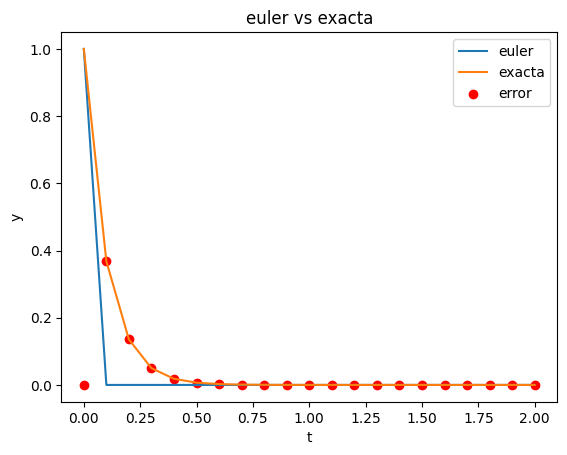

In [88]:
#Calculamos la solución
ts,eu= euler(f,0 , 2, 1, 20)
#Exacta
exacta=np.exp(-10*(ts))

#Graficamos
plt.plot(ts, eu, label='euler')
plt.plot(ts, exacta, label='exacta')
plt.scatter(ts, np.abs(eu - exacta), color='red',label='error')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('euler vs exacta')
plt.show()

In [89]:
np.abs(eu - exacta)

array([0.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04, 4.53999298e-05, 1.67017008e-05,
       6.14421235e-06, 2.26032941e-06, 8.31528719e-07, 3.05902321e-07,
       1.12535175e-07, 4.13993772e-08, 1.52299797e-08, 5.60279644e-09,
       2.06115362e-09])

El error de euler en h debería ser lineal y además crecer a medida que se aleja del punto inicial. Aquí ocurre algo distinto. El error en los valores iniciales es alto y luego se hace cada vez más pequeño (se puede también ver en el array). A pesar de que el problema no llega a ser una ecuación diferencial rígida, podemos hacer un análogo, ya que el método de euler demuestra no ser muy eficiente en este tipo de problemas con exponente negativo alto. La solución sería ocupar otro tipo de métodos, como el Runge Kutta.

# Calificación: 6.5

Está bien, pero hay un error en el análisis:

En realidad lo que ocurre es que la cota para el error es pesimista. No se viola ya que el error es efectivamente menor que lo establecido por la cota.